In [1]:
from customNN import NeuralNetwork, ReLU, Dense, softmax_crossentropy_with_logits, grad_softmax_crossentropy_with_logits
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
## Import dataset 

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

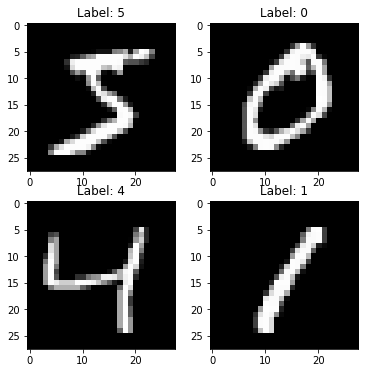

In [3]:
# sample plot 
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray')

In [4]:
# build the NeuralNetwork. Note it inherits from list, thus the append method.
network = NeuralNetwork(l2_regularisation=False)
network.append(Dense(X_train.shape[1],100))
network.append(ReLU())
network.append(Dense(100,200))
network.append(ReLU())
network.append(Dense(200,10))
X_train.shape[1]
print('Network object:', network, '\n')

print('Printing weights of last dense layer, at element 5:\n\n', network[-1].get_weights()[5])

Network object: [<customNN.Dense object at 0x7fd68fcb6090>, <customNN.ReLU object at 0x7fd68fd53f50>, <customNN.Dense object at 0x7fd68fd53dd0>, <customNN.ReLU object at 0x7fd68fcee710>, <customNN.Dense object at 0x7fd68fd53c90>] 

Printing weights of last dense layer, at element 5:

 [ 4.93437236e-03 -2.70436525e-02 -5.55185797e-03  1.50856026e-05
  8.57093817e-03  1.48114365e-02 -2.19661122e-03  1.50339816e-02
 -1.48238505e-02 -8.56164218e-03]


Epoch 4
Loss: 0.2580759037404344


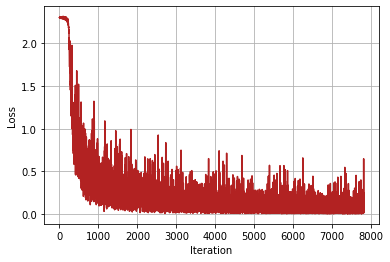

In [5]:
# train, with visualise=True

mean_loss = network.train(X=X_train, y=y_train, epochs=5, batchsize=32, visualise=True, shuffle=False)
weights_iter_1 = network[-1].get_weights()

In [6]:
# Now obtain predictions and evaluate model
predictions = network.predict(X=X_test)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy of the predictions is:', accuracy_score(y_test, predictions))

Accuracy of the predictions is: 0.9642


Normalized confusion matrix


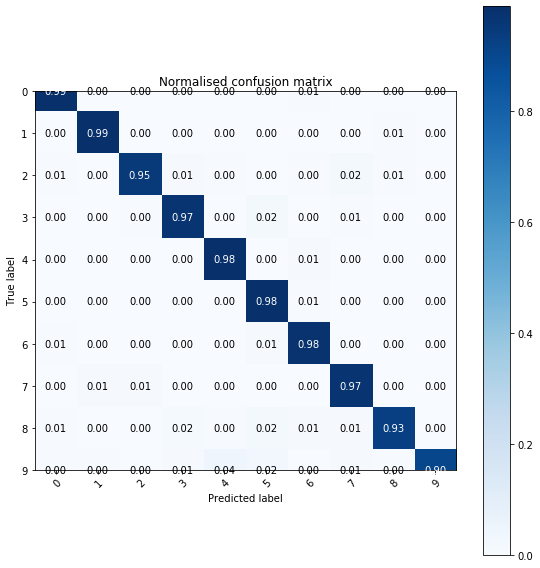

In [8]:
from graphing_utils import plot_confusion_matrix
plot_confusion_matrix(y_true=y_test, y_pred=predictions, classes=np.unique(y_test), normalise=True,
                     title='Normalised confusion matrix')